In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor,plot_tree
from sklearn.metrics import mean_squared_error,r2_score

In [180]:
ds = pd.read_csv(r'C:\Users\Jaya Krishna Sai\Desktop\Python\segcluster\Regression\USA_Housing.csv')

In [181]:
ds.drop('Address',axis=1,inplace=True)

In [182]:
ds.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05


In [183]:
scaler = MinMaxScaler()
scaled = pd.DataFrame(scaler.fit_transform(ds),columns=ds.columns)

In [184]:
scaled.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,0.686822,0.441986,0.501502,0.464444,0.329942,0.425210
1,0.683521,0.488538,0.464501,0.242222,0.575968,0.607369
2,0.483737,0.468609,0.701350,0.695556,0.528582,0.425192
3,0.506630,0.660956,0.312430,0.280000,0.491549,0.507384
4,0.469223,0.348556,0.611851,0.495556,0.376988,0.250702


In [185]:
X = scaled.drop('Price',axis=1)
y= scaled['Price']

In [186]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [187]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3500, 5), (1500, 5), (3500,), (1500,))

In [188]:
tree = DecisionTreeRegressor()
tree.fit(X_train,y_train)

DecisionTreeRegressor()

In [189]:
y_pred = tree.predict(X_test)
y_pred

array([0.72608002, 0.49721974, 0.53983697, ..., 0.56440602, 0.59418128,
       0.42214709])

In [190]:

print('Mean squared eroor:', mean_squared_error(y_test,y_pred))


Mean squared eroor: 0.005388283595187312


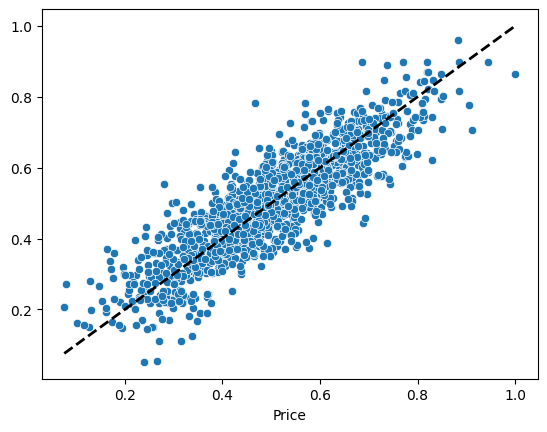

In [191]:
sns.scatterplot(x=y_test,y=y_pred)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=2)
plt.show()

In [192]:
plt.figure(figsize=(10,5))
plot_tree(y_pred)
plt.show()

InvalidParameterError: The 'decision_tree' parameter of plot_tree must be an instance of 'sklearn.tree._classes.DecisionTreeClassifier' or an instance of 'sklearn.tree._classes.DecisionTreeRegressor'. Got array([0.72608002, 0.49721974, 0.53983697, ..., 0.56440602, 0.59418128,
       0.42214709]) instead.

<Figure size 1000x500 with 0 Axes>